TASK 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [2]:
# LOAD DATA

df= pd.read_csv("customer_churn_data.csv")

#  INFO
print("DETAILS : ")
df.info



DETAILS : 


<bound method DataFrame.info of       customer_id  age  gender  senior_citizen partner dependents  tenure  \
0     CUST_000001   52    Male               0     Yes        Yes       7   
1     CUST_000002   42    Male               0     Yes         No      32   
2     CUST_000003   54    Male               0      No        Yes      12   
3     CUST_000004   67    Male               1      No         No       3   
4     CUST_000005   41  Female               0     Yes         No       7   
...           ...  ...     ...             ...     ...        ...     ...   
9995  CUST_009996   64  Female               0     Yes        Yes      49   
9996  CUST_009997   18  Female               0      No        Yes      53   
9997  CUST_009998   34    Male               0      No         No      21   
9998  CUST_009999   52  Female               0      No        Yes       7   
9999  CUST_010000   54  Female               0      No         No      40   

     phone_service multiple_lines internet_

In [3]:
# DATATYPES

print("DATATYPES")
df.dtypes

DATATYPES


customer_id               object
age                        int64
gender                    object
senior_citizen             int64
partner                   object
dependents                object
tenure                     int64
phone_service             object
multiple_lines            object
internet_service          object
online_security           object
online_backup             object
device_protection         object
tech_support              object
streaming_tv              object
streaming_movies          object
contract                  object
paperless_billing         object
payment_method            object
monthly_charges          float64
total_charges            float64
customer_satisfaction      int64
support_calls              int64
churn                     object
dtype: object

In [4]:
# SHAPE
print("SHAPE :",df.shape)

SHAPE : (10000, 24)


In [5]:
# Handling for MISSING VALUES

print("Missing values:\n",df.isnull().sum()) 

df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)


Missing values:
 customer_id              0
age                      0
gender                   0
senior_citizen           0
partner                  0
dependents               0
tenure                   0
phone_service            0
multiple_lines           0
internet_service         0
online_security          0
online_backup            0
device_protection        0
tech_support             0
streaming_tv             0
streaming_movies         0
contract                 0
paperless_billing        0
payment_method           0
monthly_charges          0
total_charges            0
customer_satisfaction    0
support_calls            0
churn                    0
dtype: int64


In [6]:
# Summary 

print(df.describe())

                age  senior_citizen        tenure  monthly_charges  \
count  10000.000000    10000.000000  10000.000000     10000.000000   
mean      44.662500        0.092300     22.216800        53.640204   
std       14.397976        0.289463     19.963232        17.047669   
min       18.000000        0.000000      1.000000        20.050000   
25%       34.000000        0.000000      6.000000        40.407500   
50%       44.000000        0.000000     16.000000        51.770000   
75%       55.000000        0.000000     33.000000        66.280000   
max       80.000000        1.000000     72.000000       111.810000   

       total_charges  customer_satisfaction  support_calls  
count   10000.000000           10000.000000   10000.000000  
mean     1192.146321               3.399300       2.007400  
std      1193.960345               1.069193       1.415184  
min        20.320000               1.000000       0.000000  
25%       306.305000               3.000000       1.000000  
50%

TASK 2


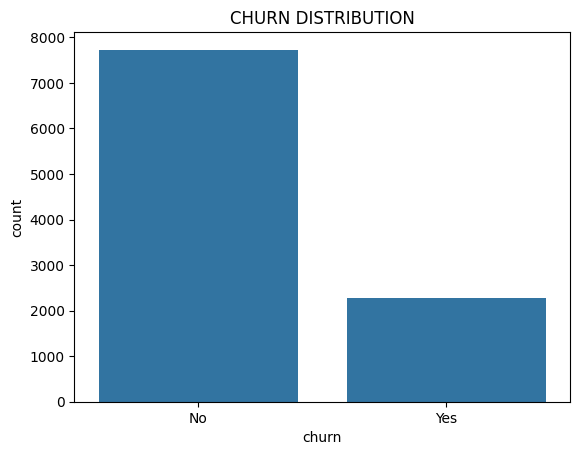

In [7]:
sns.countplot(x='churn', data=df)
plt.title("CHURN DISTRIBUTION")
plt.show()



In [8]:

cr = df['churn'].value_counts(normalize=True) * 100
print("Churn Rate (%):\n", cr)

Churn Rate (%):
 churn
No     77.28
Yes    22.72
Name: proportion, dtype: float64


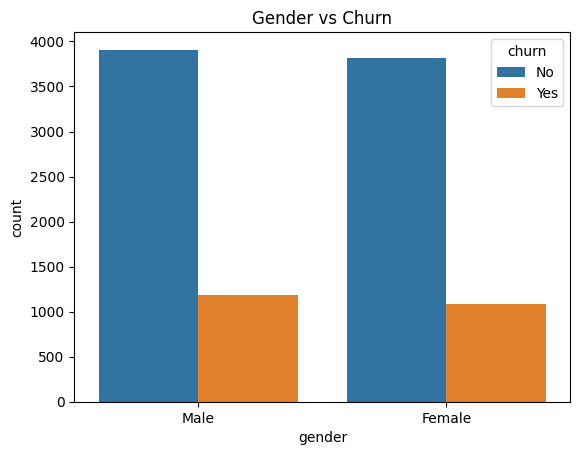

In [9]:
sns.countplot(x='gender', hue='churn', data=df)
plt.title("Gender vs Churn")
plt.show()


Text(0.5, 1.0, 'Age Distribution')

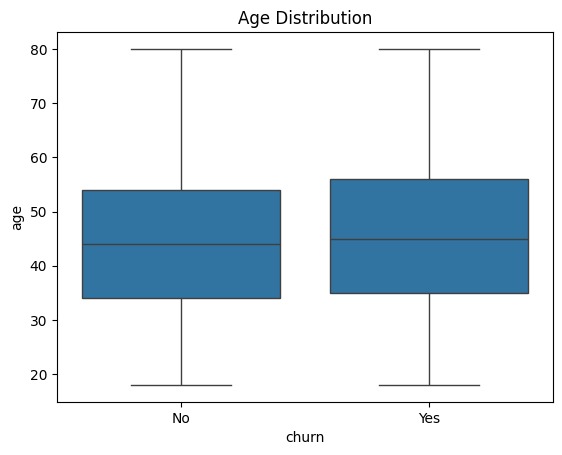

In [10]:
sns.boxplot(data=df, x='churn', y='age')
plt.title('Age Distribution')

Text(0.5, 1.0, 'Senior Citizen vs Churn')

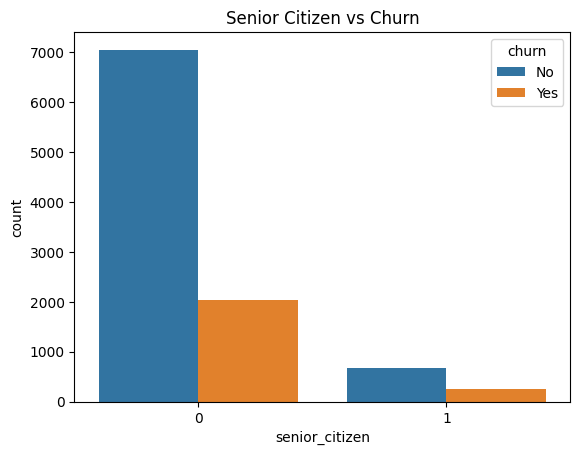

In [11]:
sns.countplot(data=df, x='senior_citizen', hue='churn')
plt.title('Senior Citizen vs Churn')

Text(0.5, 1.0, 'Partner vs Churn')

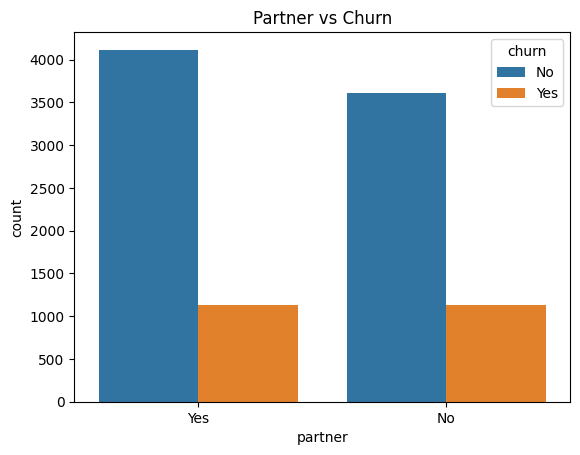

In [12]:
sns.countplot(data=df, x='partner', hue='churn')
plt.title('Partner vs Churn')

Text(0.5, 1.0, 'Dependents vs Churn')

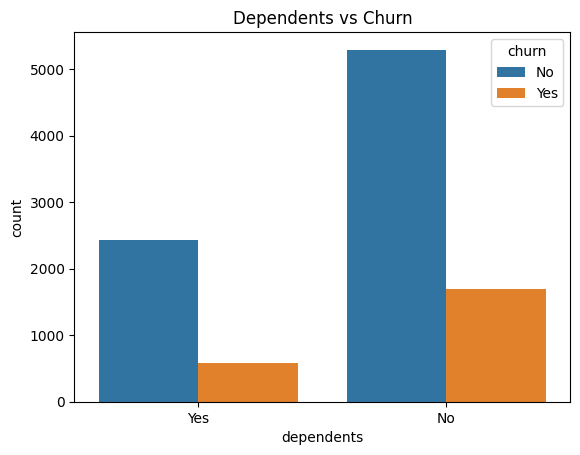

In [13]:
sns.countplot(data=df, x='dependents', hue='churn')
plt.title('Dependents vs Churn')

Text(0.5, 1.0, 'Tenure vs Churn')

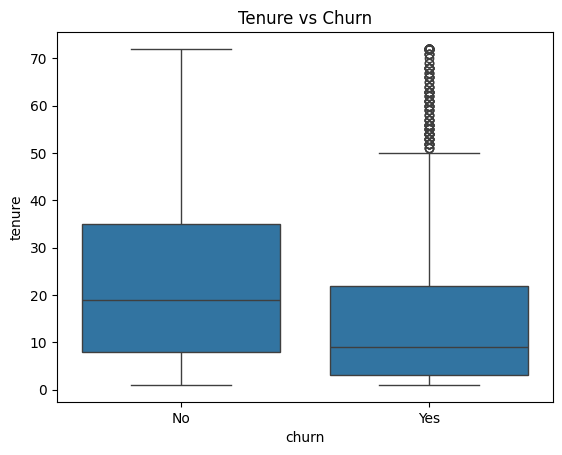

In [14]:
sns.boxplot(data=df, x='churn', y='tenure')
plt.title('Tenure vs Churn')

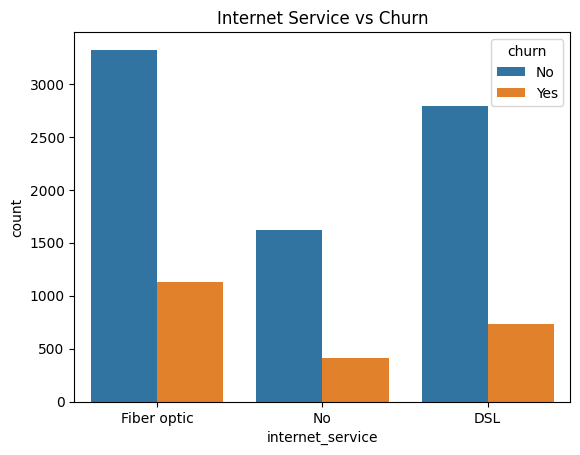

In [15]:
sns.countplot(x='internet_service', hue='churn', data=df)
plt.title("Internet Service vs Churn")
plt.show()


([0, 1, 2],
 [Text(0, 0, 'No'), Text(1, 0, 'Yes'), Text(2, 0, 'No phone service')])

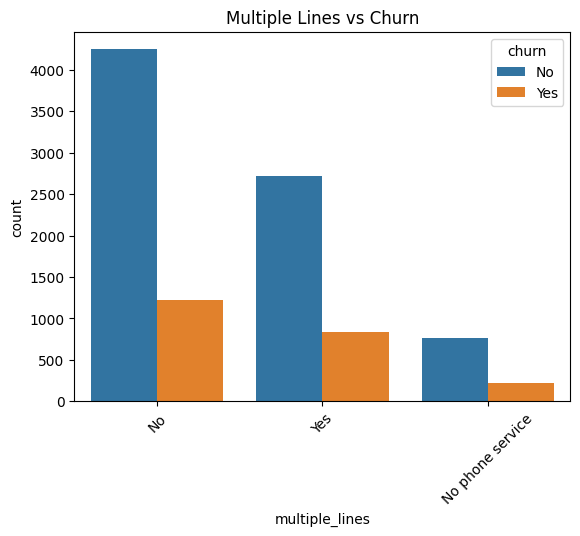

In [16]:
sns.countplot(data=df, x='multiple_lines', hue='churn')
plt.title('Multiple Lines vs Churn')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Paperless Billing vs Churn')

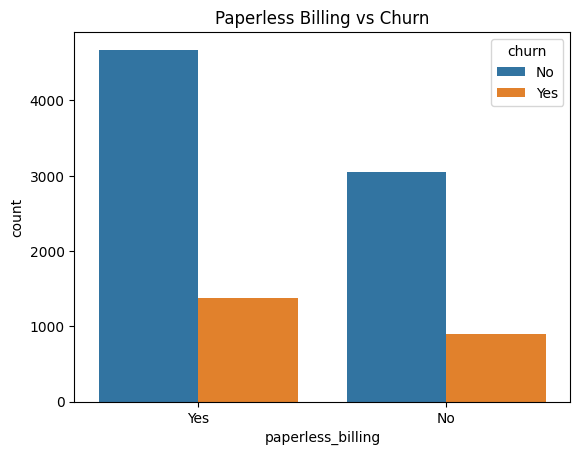

In [17]:
sns.countplot(data=df, x='paperless_billing', hue='churn')
plt.title('Paperless Billing vs Churn')

Text(0.5, 1.0, 'Phone Service vs Churn')

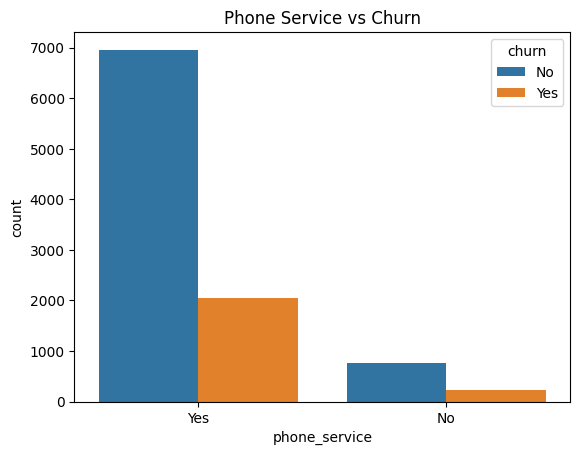

In [18]:
sns.countplot(data=df, x='phone_service', hue='churn')
plt.title('Phone Service vs Churn')

([0, 1, 2, 3],
 [Text(0, 0, 'Electronic check'),
  Text(1, 0, 'Bank transfer (automatic)'),
  Text(2, 0, 'Credit card (automatic)'),
  Text(3, 0, 'Mailed check')])

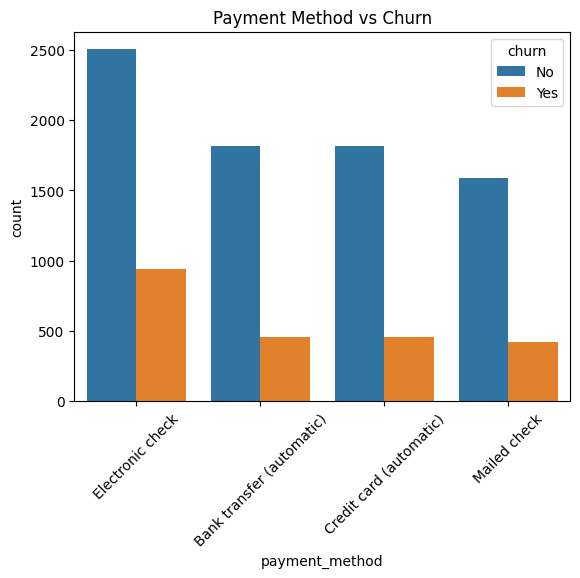

In [19]:
sns.countplot(data=df, x='payment_method', hue='churn')
plt.title('Payment Method vs Churn')
plt.xticks(rotation=45)

([0, 1, 2],
 [Text(0, 0, 'One year'),
  Text(1, 0, 'Month-to-month'),
  Text(2, 0, 'Two year')])

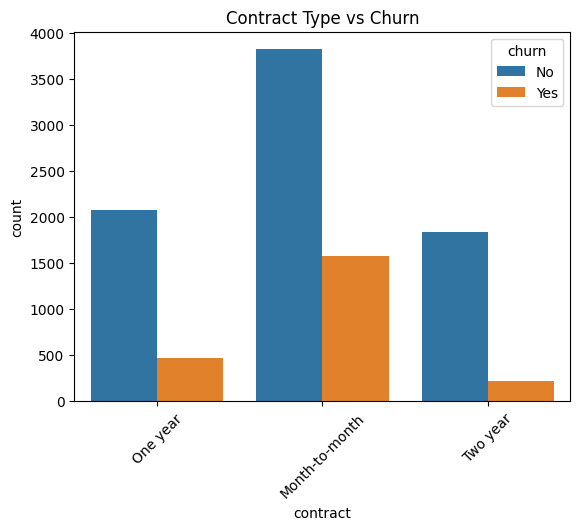

In [20]:
sns.countplot(data=df, x='contract', hue='churn')
plt.title('Contract Type vs Churn')
plt.xticks(rotation=45)


Text(0.5, 1.0, 'Customer Satisfaction vs Churn')

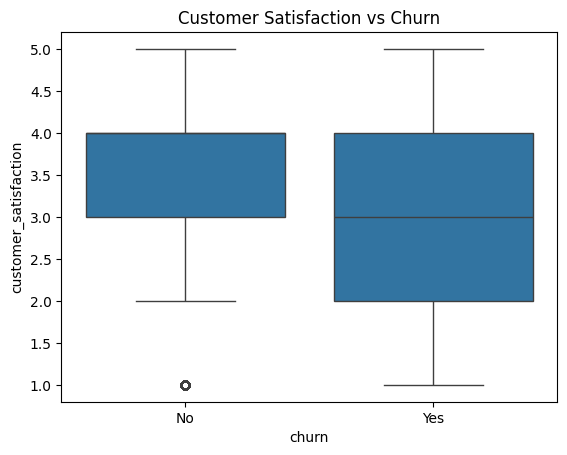

In [21]:
sns.boxplot(data=df, x='churn', y='customer_satisfaction')
plt.title('Customer Satisfaction vs Churn')

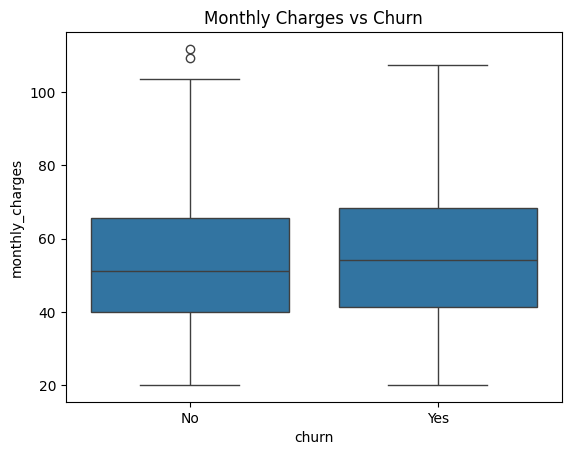

In [22]:
sns.boxplot(x='churn', y='monthly_charges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

Text(0.5, 1.0, 'Total Charges vs Churn')

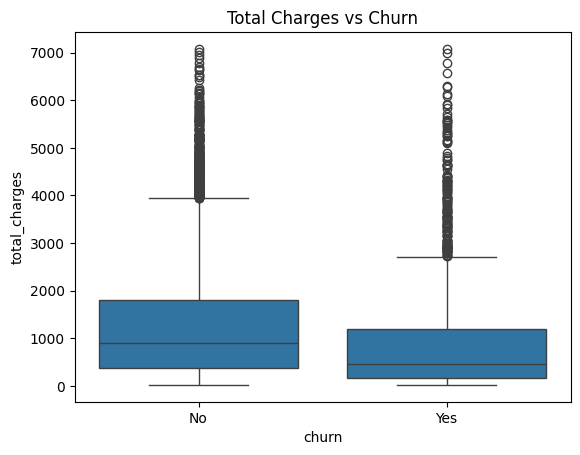

In [23]:
df['total_charges'] = pd.to_numeric(df['total_charges'], errors='coerce')
sns.boxplot(data=df, x='churn', y='total_charges')
plt.title('Total Charges vs Churn')

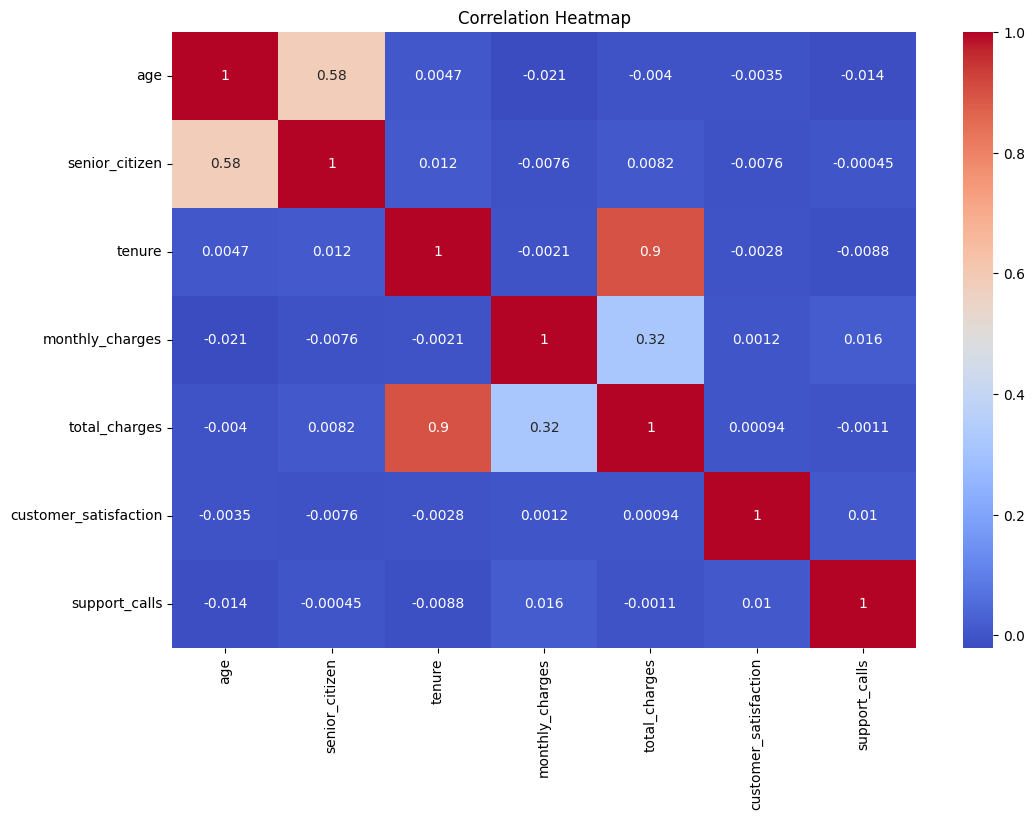

In [24]:
num_features = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12,8))
sns.heatmap(num_features.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

TASK 3


In [25]:
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

scaler = StandardScaler()
num_cols = df_encoded.select_dtypes(include=[np.number]).columns.drop('churn')
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

X = df_encoded.drop('churn', axis=1)
y = df_encoded['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("Categorical variables encoded:")
print(list(df_encoded.keys()))

Categorical variables encoded:
['customer_id', 'age', 'gender', 'senior_citizen', 'partner', 'dependents', 'tenure', 'phone_service', 'multiple_lines', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing', 'payment_method', 'monthly_charges', 'total_charges', 'customer_satisfaction', 'support_calls', 'churn']


In [29]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

# Define hyperparameter grids
param_grids = {
    "Logistic Regression": {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs']
    },
    "Decision Tree": {
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }
}

best_models = {}
training_results = {}

for name, model in models.items():
    print(f"Training {name}...")

    # Search for best parameters by trying all combinations on validation set (manual grid search)
    best_f1 = 0
    best_params = None
    param_grid = param_grids.get(name, {})
    
    from itertools import product
    
    # If no params given, just train default model
    if param_grid:
        keys = list(param_grid.keys())
        values = list(param_grid.values())
        for param_combination in product(*values):
            params = dict(zip(keys, param_combination))
            model.set_params(**params)
            model.fit(X_train, y_train)
            
            y_val_pred = model.predict(X_val)
            f1 = f1_score(y_val, y_val_pred)
            
            if f1 > best_f1:
                best_f1 = f1
                best_params = params
                best_model = model
    else:
        # No hyperparameters to tune
        model.fit(X_train, y_train)
        y_val_pred = model.predict(X_val)
        best_f1 = f1_score(y_val, y_val_pred)
        best_params = model.get_params()
        best_model = model

    best_models[name] = best_model
    training_results[name] = {
        'best_params': best_params,
        'val_f1_score': best_f1
    }

    print(f"Best parameters for {name}: {best_params}")
    print(f"Validation F1 score for {name}: {best_f1:.4f}\n")

# Optionally, you can print a summary of all models
print("Summary of best models and validation F1 scores:")
for name, result in training_results.items():
    print(f"{name}: F1 = {result['val_f1_score']:.4f} with params {result['best_params']}")

Training Logistic Regression...
Best parameters for Logistic Regression: {'C': 10, 'solver': 'liblinear'}
Validation F1 score for Logistic Regression: 0.2841

Training Decision Tree...
Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 10}
Validation F1 score for Decision Tree: 0.3806

Training Random Forest...
Best parameters for Random Forest: {'n_estimators': 50, 'max_depth': None, 'min_samples_split': 5}
Validation F1 score for Random Forest: 0.3187

Training SVM...
Best parameters for SVM: {'C': 10, 'kernel': 'rbf', 'gamma': 'scale'}
Validation F1 score for SVM: 0.3421

Summary of best models and validation F1 scores:
Logistic Regression: F1 = 0.2841 with params {'C': 10, 'solver': 'liblinear'}
Decision Tree: F1 = 0.3806 with params {'max_depth': 10, 'min_samples_split': 10}
Random Forest: F1 = 0.3187 with params {'n_estimators': 50, 'max_depth': None, 'min_samples_split': 5}
SVM: F1 = 0.3421 with params {'C': 10, 'kernel': 'rbf', 'gamma': 'scale'}



Logistic Regression Evaluation on Test Set
Accuracy:  0.7830
Precision: 0.5963
Recall:    0.2065
F1 Score:  0.3067


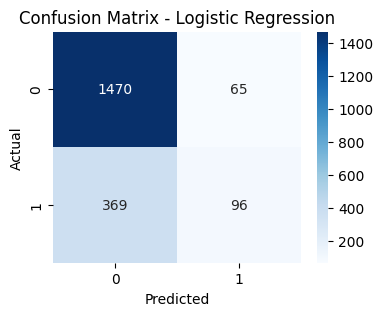


Decision Tree Evaluation on Test Set
Accuracy:  0.7000
Precision: 0.3476
Recall:    0.3312
F1 Score:  0.3392


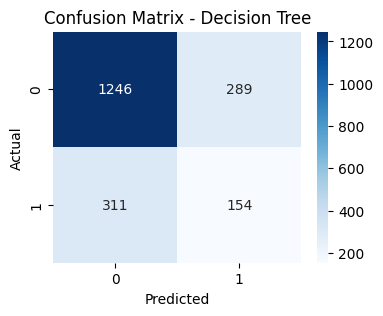


Random Forest Evaluation on Test Set
Accuracy:  0.7855
Precision: 0.6525
Recall:    0.1656
F1 Score:  0.2642


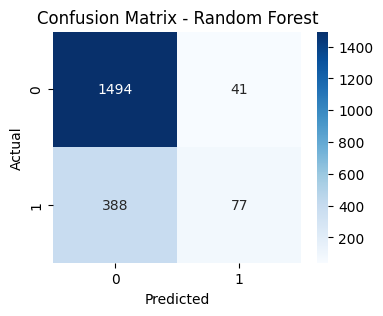


SVM Evaluation on Test Set
Accuracy:  0.7505
Precision: 0.4437
Recall:    0.2882
F1 Score:  0.3494


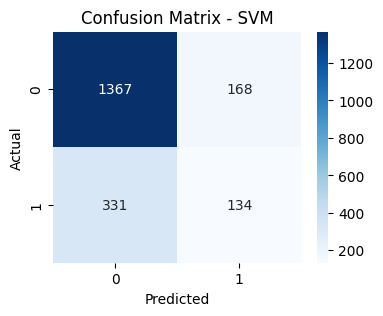


 Model Performance Summary 


,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.7830,0.596273,0.206452,0.306709
Decision Tree,0.7000,0.347630,0.331183,0.339207
Random Forest,0.7855,0.652542,0.165591,0.264151
SVM,0.7505,0.443709,0.288172,0.349413



Best Model on Test Set: Random Forest with Accuracy = 0.7855


In [30]:
performance_results = {}


for name, model in best_models.items():
    print(f"\n{name} Evaluation on Test Set")
    y_pred = model.predict(X_test)
    
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    performance_results[name] = {
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    }
    
   
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    
  
    plt.figure(figsize=(4, 3))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()


print("\n Model Performance Summary ")
perf_df = pd.DataFrame(performance_results).T
display(perf_df)

best_model_name = perf_df['Accuracy'].idxmax()
best_model = best_models[best_model_name]
print(f"\nBest Model on Test Set: {best_model_name} with Accuracy = {perf_df['Accuracy'].max():.4f}")